In [1]:
#Importing necessary lobraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import preprocessing
from time import time
import pprint
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer


%matplotlib inline

C:\Users\svarshne\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\svarshne\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importing the data
bank_additional = pd.read_csv("bank-additional-full.csv", sep=";")

***Next section describes the data set.***

In [3]:
bank_additional.shape

(41188, 21)

***Dataset contains 41188 observations and 21 variables including output variable.***

In [4]:
bank_additional.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [5]:
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

***Dataset contains no null value in any of the variable as values which were not known has been replaced by "unknown" and which will be considered as one value in itself.***

In [6]:
bank_additional["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

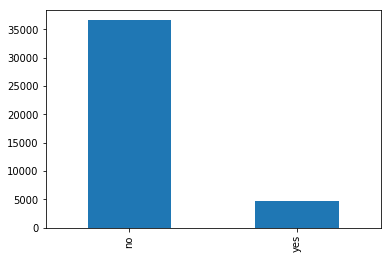

In [7]:
bank_additional["y"].value_counts().plot(kind="bar")

***We can clearly see that outcome variable y values are skewed towards the "no" as we have count of "no" are almost 8 times more than count of "yes".***

In [8]:
bank_additional.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
pd.set_option('display.max_columns', None)
display(bank_additional.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


***Next section provides the single variable analysis of various columns in dataframe. Numeric values will be analyzed using histograms and boxplots and categorical variables will be analyzed with counts.***

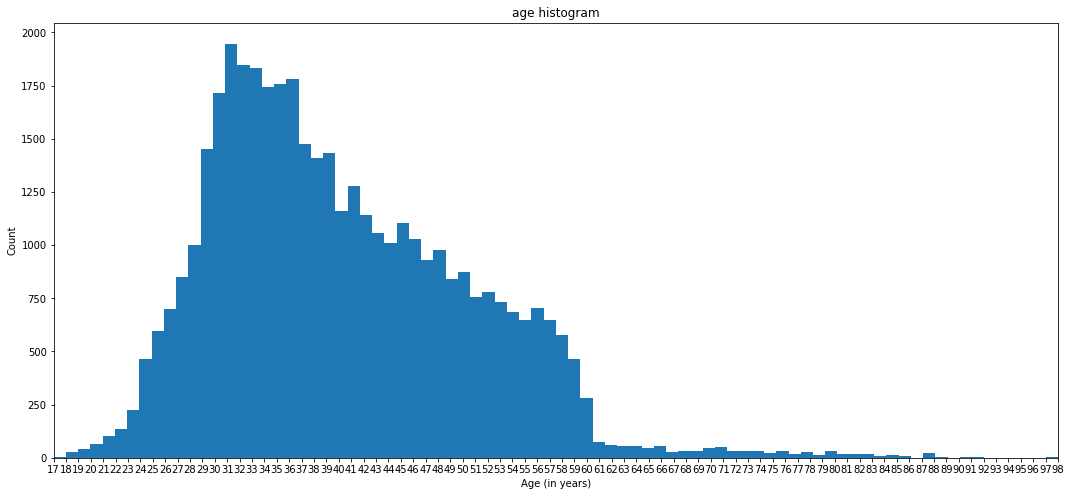

In [10]:
plt.figure(figsize=(18, 8))
plt.hist(bank_additional["age"], bins=82)
plt.title("age histogram")
plt.xticks(range(0, 100))
plt.xlabel("Age (in years)")
plt.ylabel("Count")
plt.xlim((17, 98))
plt.show()

***From the histogram of age distribution, we can clearly see distribution has high values between 24 years to 60 years and then steep fall beyond that on both the sides. So it is clear that calls were made more to the people with age from 24 years to 60 years.***

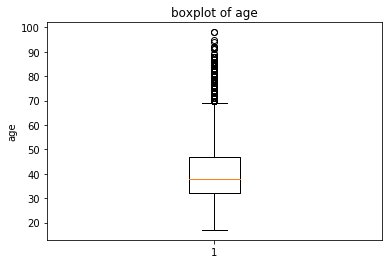

In [11]:
plt.boxplot(bank_additional["age"])
plt.title("boxplot of age")
plt.ylabel("age")
plt.show()

***We can clearly see there are some outliers in the age variable but these outliers can't be ignored.***

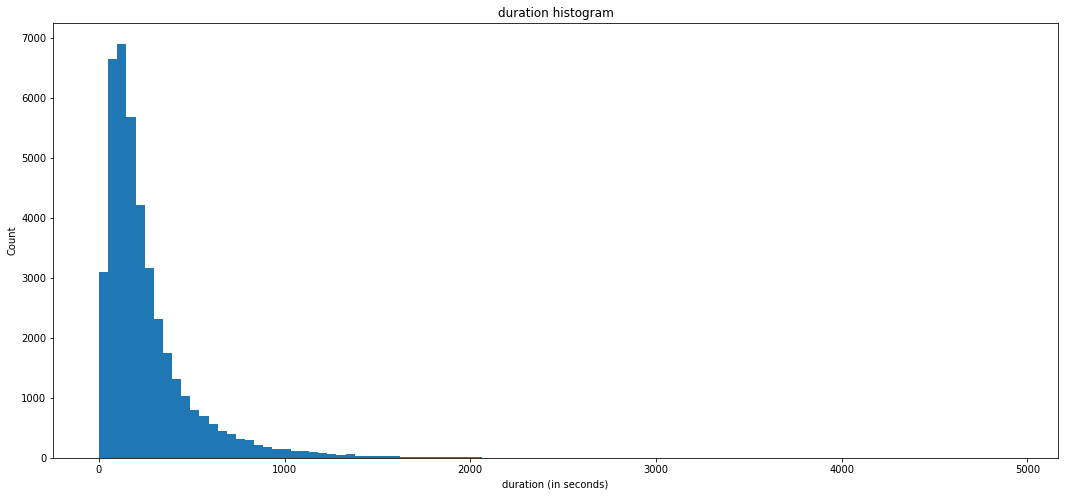

In [12]:
plt.figure(figsize=(18, 8))
plt.hist(bank_additional["duration"], bins=100)
plt.title("duration histogram")
plt.xlabel("duration (in seconds)")
plt.ylabel("Count")
plt.show()

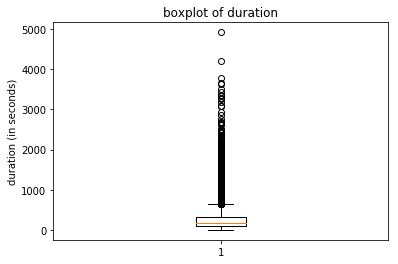

In [13]:
plt.boxplot(bank_additional["duration"])
plt.title("boxplot of duration")
plt.ylabel("duration (in seconds)")
plt.show()

***From the histogram and boxplot of duration, we can clearly see these values are highly skewed. Also this variable is highly correlated with outcome as if duration is 0 then outcome is definitely "no". So we need to remove this variable while working on this dataset.***

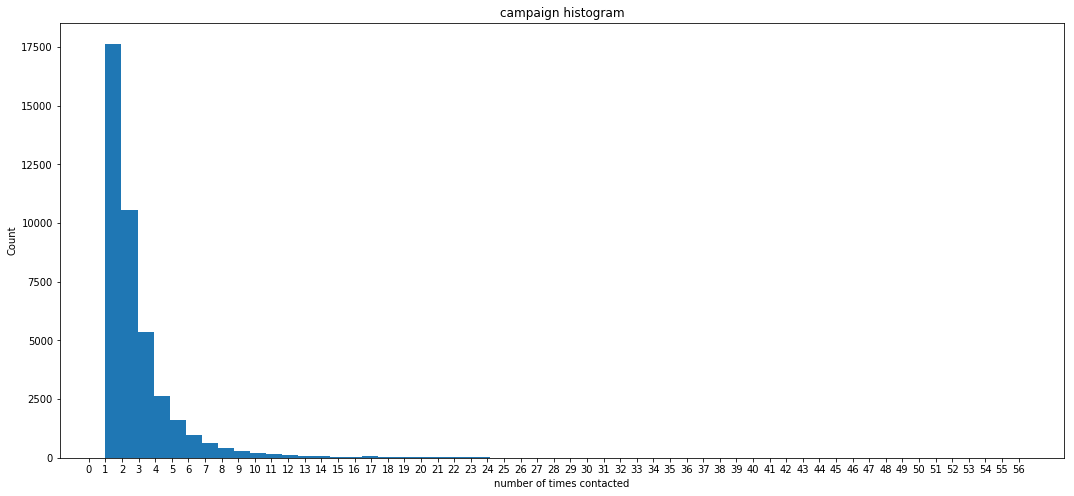

In [14]:
plt.figure(figsize=(18, 8))
plt.hist(bank_additional["campaign"], bins=57)
plt.title("campaign histogram")
plt.xlabel("number of times contacted")
plt.ylabel("Count")
plt.xticks(range(0, 57))
plt.show()

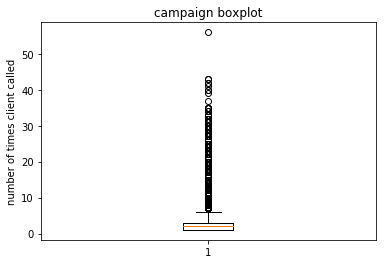

In [15]:
plt.boxplot(bank_additional["campaign"])
plt.title("campaign boxplot")
plt.ylabel("number of times client called")
plt.show()

***We can see another skewed histogram for and boxplot for the number of times a particular client was contacted during this campaign. Most of the clients were contacted either 1, 2, or 3 times but we can see some clients were contacted around 30-40 times as well.***

In [16]:
"function to plot bar plot from counts"
def count_bar_plot(variable, title, xlabel, ylabel):
    """This function show the value counts of categorical variable and plot bar plot"""
    count = bank_additional[variable].value_counts()
    print(count)
    count.plot(kind = "bar", title = title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


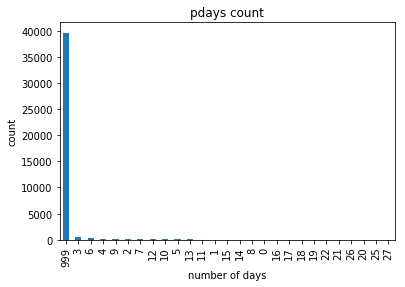

In [17]:
count_bar_plot("pdays", "pdays count", "number of days", "count")

***From the bar graph it is clear that most of clients were contacted first time. Value 999 denotes that client was never contacted previously.***

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


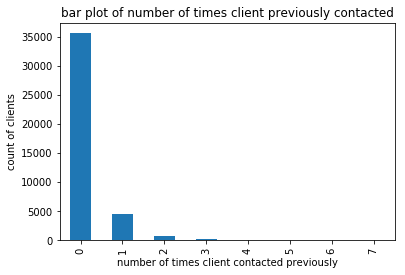

In [18]:
count_bar_plot("previous", "bar plot of number of times client previously contacted", 
              "number of times client contacted previously", "count of clients")

***From this bar plot, we can see that most of the clients were contacted first time.***

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


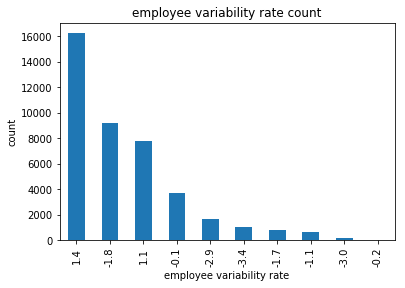

In [19]:
count_bar_plot("emp.var.rate", "employee variability rate count", "employee variability rate", 
              "count")

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64


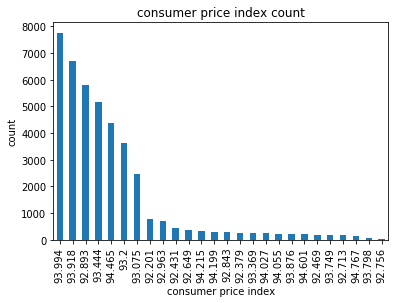

In [20]:
count_bar_plot("cons.price.idx", "consumer price index count", "consumer price index", "count")

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64


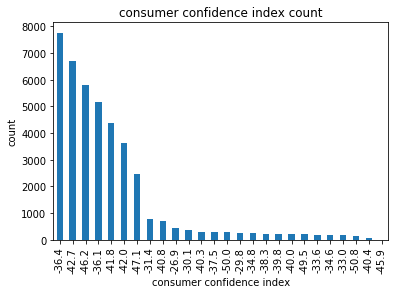

In [21]:
count_bar_plot("cons.conf.idx", "consumer confidence index count", "consumer confidence index", 
              "count")

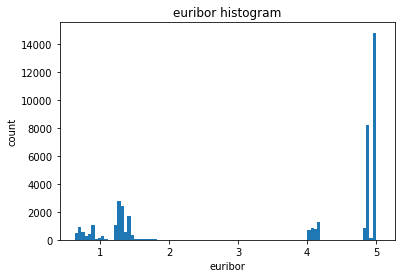

In [22]:
plt.hist(bank_additional["euribor3m"], bins=93)
plt.title("euribor histogram")
plt.xlabel("euribor")
plt.ylabel("count")
plt.show()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


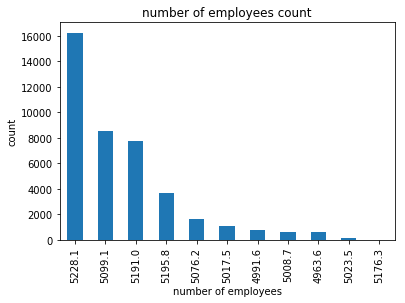

In [23]:
count_bar_plot("nr.employed", "number of employees count", "number of employees", 
              "count")

***Above 5 graphs are social indicators and doesnt depict much information here.***

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


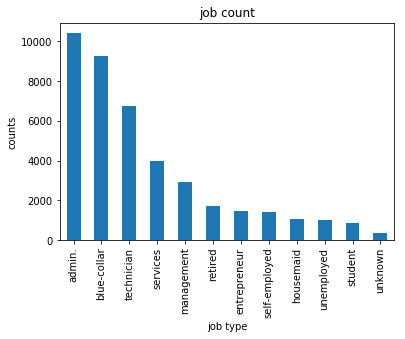

In [24]:
count_bar_plot("job", "job count", "job type", "counts")

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


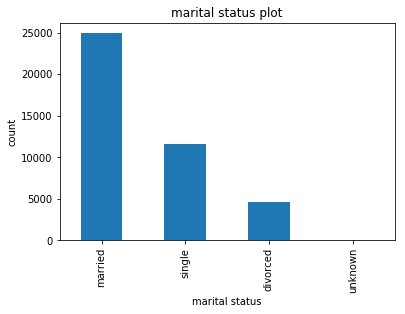

In [25]:
count_bar_plot("marital", "marital status plot", "marital status", "count")

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


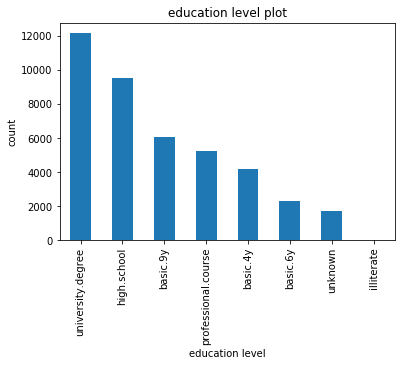

In [26]:
count_bar_plot("education", "education level plot", "education level", "count")

***Above 3 graphs shows the distribution of job type, marital status and education level. Permanent job people, married and high education clients were contacted more.***

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


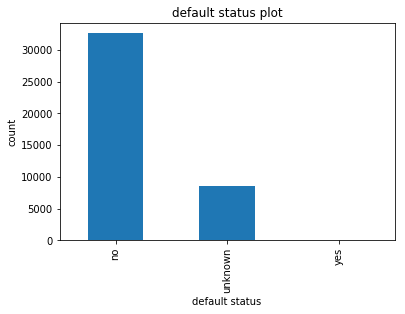

In [27]:
count_bar_plot("default", "default status plot", "default status", "count")

***Cleints with credit defaults were not contacted most of the times as we can see only count as 3.***

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


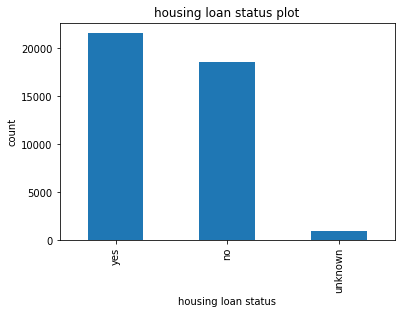

In [28]:
count_bar_plot("housing", "housing loan status plot", "housing loan status", "count")

***Not very high difference between clients who has housing loan or who doesn't have but clients with housing loan were contacted more.***

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


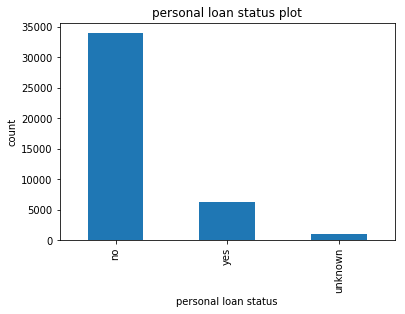

In [29]:
count_bar_plot("loan", "personal loan status plot", "personal loan status", "count")

***Clients with no personal loan are preferred***

cellular     26144
telephone    15044
Name: contact, dtype: int64


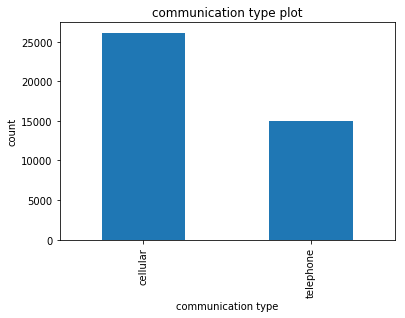

In [30]:
count_bar_plot("contact", "communication type plot", "communication type", "count")

***More number of clients were called on cellular phones instead of telephone.***

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


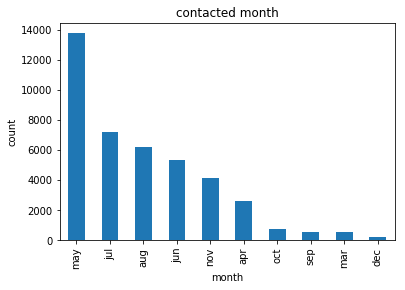

In [31]:
count_bar_plot("month", "contacted month", "month", "count")

***Very less number of clients were called in September, October, December and March.***

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


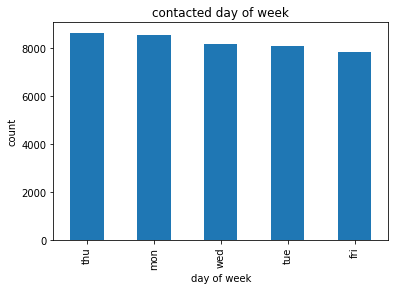

In [32]:
count_bar_plot("day_of_week", "contacted day of week", "day of week", "count")

***Almost uniform distributions of clients across the days of the week.***

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


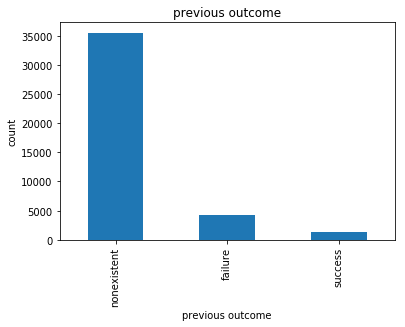

In [33]:
count_bar_plot("poutcome", "previous outcome", "previous outcome", "count")

***Most of the clients were called whose previous outcome doesnt exists. This is because most clients were new and have never been called before.***

In [34]:
"this function plot crosstab bar plot between 2 categorical variables"
def crosstab_plot(variable1, variable2, title, ylabel = "ratio"):
    "this function plots crosstab bar plot between 2 categorical variables"
    cross_tab = pd.crosstab(bank_additional[variable1], bank_additional[variable2])
    cross_tab["total"] = cross_tab.iloc[:, 0] + cross_tab.iloc[:, 1]
    cross_tab["no_ratio"] = cross_tab.iloc[:, 0] / cross_tab.iloc[:, 2]
    cross_tab["yes_ratio"] = cross_tab.iloc[:, 1] / cross_tab.iloc[:, 2]
    print(cross_tab)
    cross_tab.iloc[:, 3:].plot(kind = "bar", title = title, figsize = (18, 9))
    plt.ylabel(ylabel)
    plt.show()

y      no  yes  total  no_ratio  yes_ratio
age                                       
17      3    2      5  0.600000   0.400000
18     16   12     28  0.571429   0.428571
19     22   20     42  0.523810   0.476190
20     42   23     65  0.646154   0.353846
21     73   29    102  0.715686   0.284314
22    101   36    137  0.737226   0.262774
23    178   48    226  0.787611   0.212389
24    377   86    463  0.814255   0.185745
25    505   93    598  0.844482   0.155518
26    576  122    698  0.825215   0.174785
27    737  114    851  0.866040   0.133960
28    850  151   1001  0.849151   0.150849
29   1267  186   1453  0.871989   0.128011
30   1512  202   1714  0.882147   0.117853
31   1727  220   1947  0.887006   0.112994
32   1662  184   1846  0.900325   0.099675
33   1623  210   1833  0.885434   0.114566
34   1561  184   1745  0.894556   0.105444
35   1592  167   1759  0.905060   0.094940
36   1626  154   1780  0.913483   0.086517
37   1338  137   1475  0.907119   0.092881
38   1264  

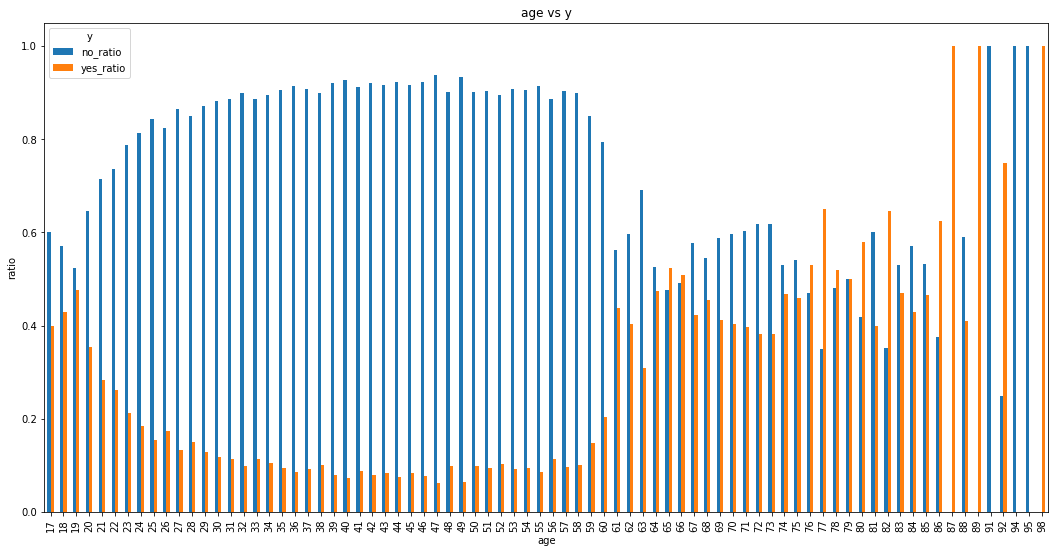

In [35]:
crosstab_plot("age", "y", "age vs y")

***We can see from the above plot that success ratio is higher for the clients with age below 25 and above 60. In the mid age group success ratio is less. So this feature can be made a categorical variable and looks impacting the outcome.***

y                no   yes  total  no_ratio  yes_ratio
job                                                  
admin.         9070  1352  10422  0.870274   0.129726
blue-collar    8616   638   9254  0.931057   0.068943
entrepreneur   1332   124   1456  0.914835   0.085165
housemaid       954   106   1060  0.900000   0.100000
management     2596   328   2924  0.887825   0.112175
retired        1286   434   1720  0.747674   0.252326
self-employed  1272   149   1421  0.895144   0.104856
services       3646   323   3969  0.918619   0.081381
student         600   275    875  0.685714   0.314286
technician     6013   730   6743  0.891740   0.108260
unemployed      870   144   1014  0.857988   0.142012
unknown         293    37    330  0.887879   0.112121


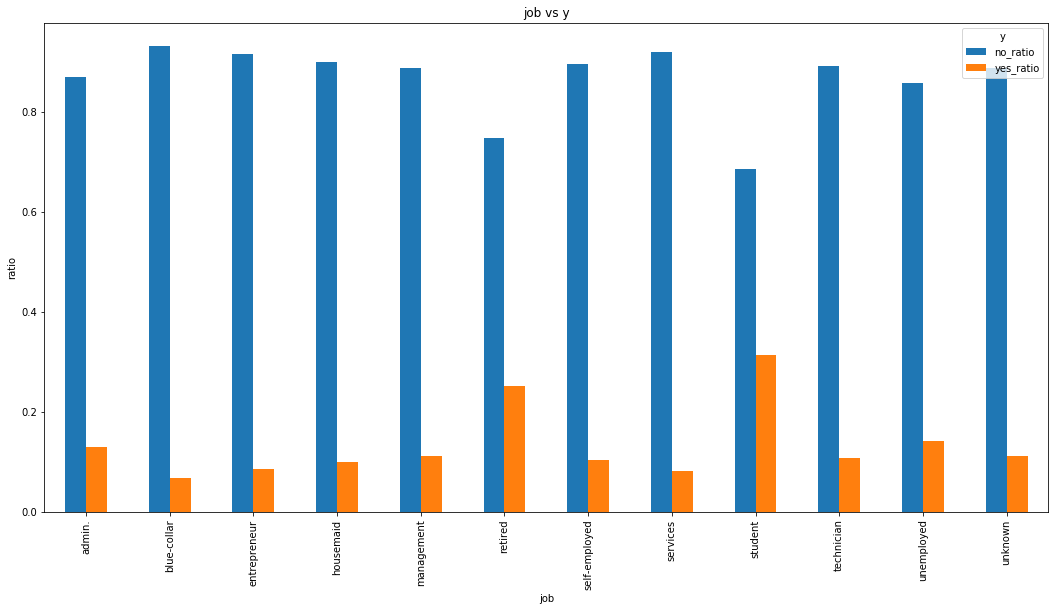

In [36]:
crosstab_plot("job", "y", "job vs y")

***Success ratio among retired and students are higher as compared to other professions.***

y            no   yes  total  no_ratio  yes_ratio
marital                                          
divorced   4136   476   4612  0.896791   0.103209
married   22396  2532  24928  0.898427   0.101573
single     9948  1620  11568  0.859959   0.140041
unknown      68    12     80  0.850000   0.150000


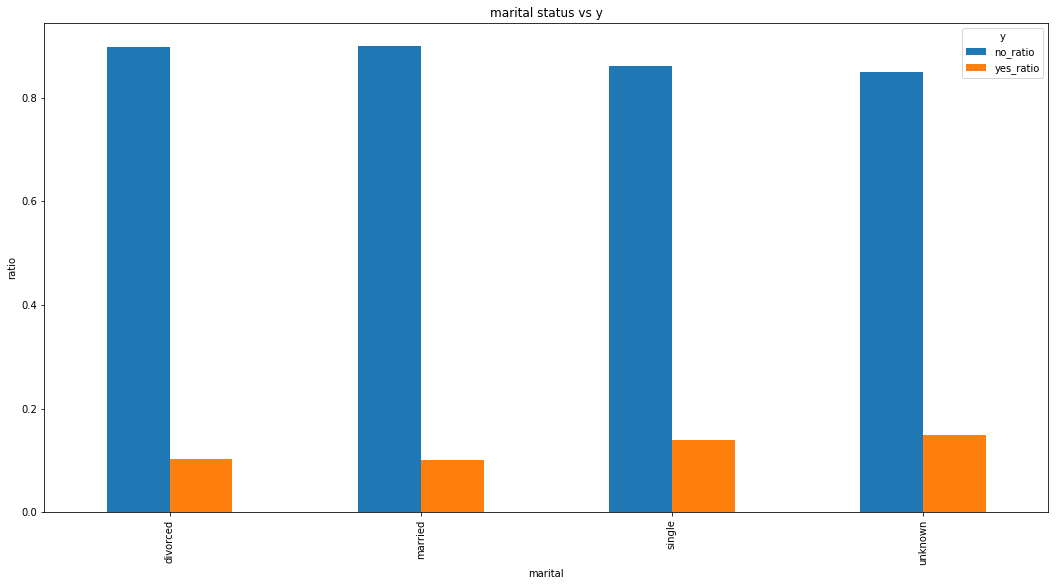

In [37]:
crosstab_plot("marital", "y", "marital status vs y")

***Not very high difference amonth the success ratios of different relationship types but it seems success ratio of Singles and unknowns are comaratively high.***

y                       no   yes  total  no_ratio  yes_ratio
education                                                   
basic.4y              3748   428   4176  0.897510   0.102490
basic.6y              2104   188   2292  0.917976   0.082024
basic.9y              5572   473   6045  0.921754   0.078246
high.school           8484  1031   9515  0.891645   0.108355
illiterate              14     4     18  0.777778   0.222222
professional.course   4648   595   5243  0.886515   0.113485
university.degree    10498  1670  12168  0.862755   0.137245
unknown               1480   251   1731  0.854997   0.145003


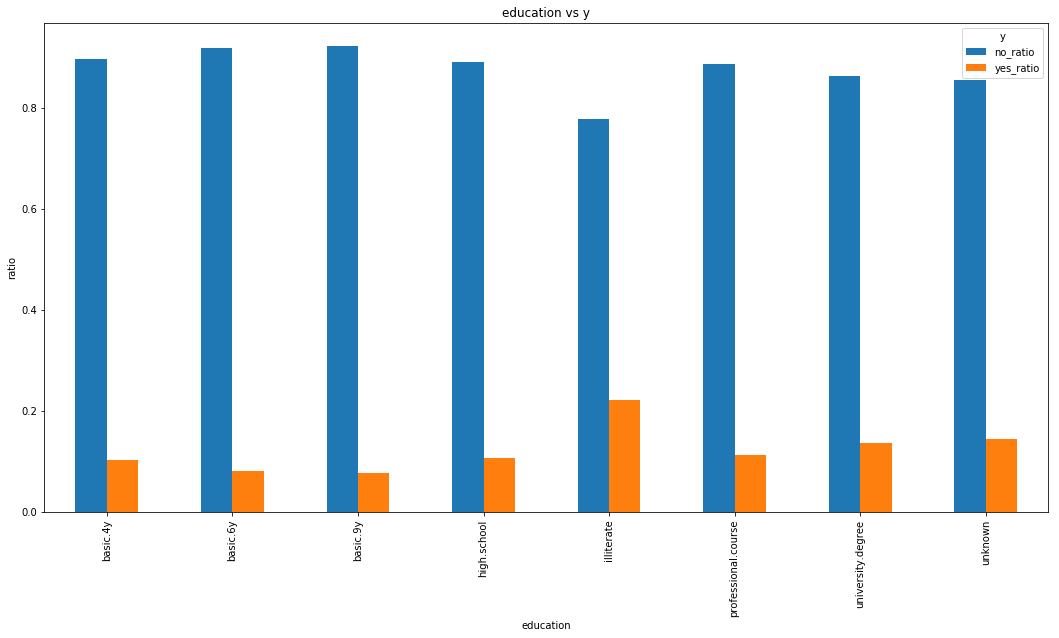

In [38]:
crosstab_plot("education", "y", "education vs y")

***Success ratio is higher for illiterate but sample size is very small. There is not strong correlation between success and client education but it seems higher the education better are the chances for success.***

y           no   yes  total  no_ratio  yes_ratio
default                                         
no       28391  4197  32588   0.87121    0.12879
unknown   8154   443   8597   0.94847    0.05153
yes          3     0      3   1.00000    0.00000


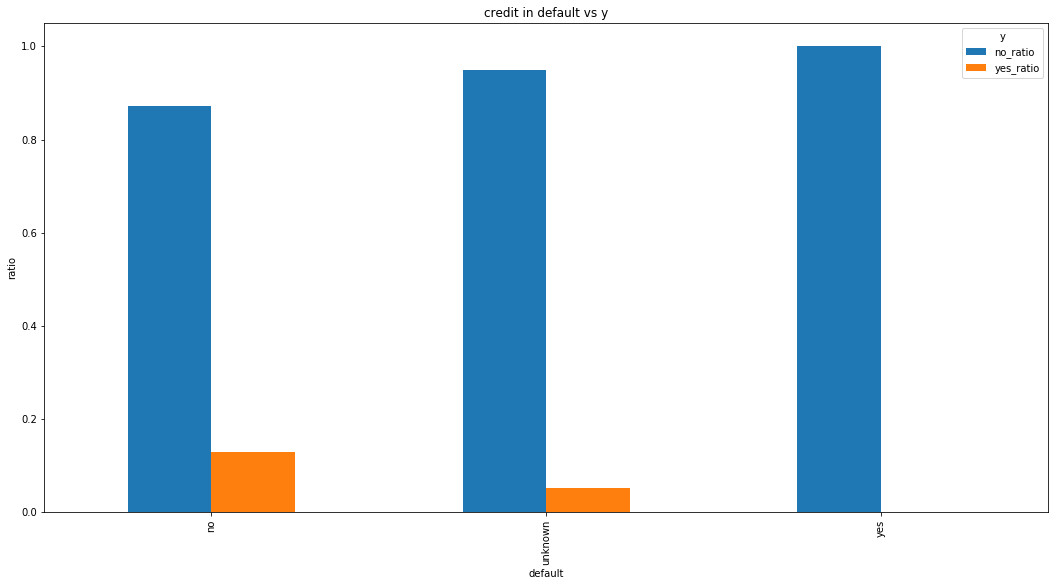

In [39]:
crosstab_plot("default", "y", "credit in default vs y")

***Sample size for credit in default clients is very less but it seems who haven't defaulted are having higher success then the one whose values are not known.***

y           no   yes  total  no_ratio  yes_ratio
housing                                         
no       16596  2026  18622  0.891204   0.108796
unknown    883   107    990  0.891919   0.108081
yes      19069  2507  21576  0.883806   0.116194


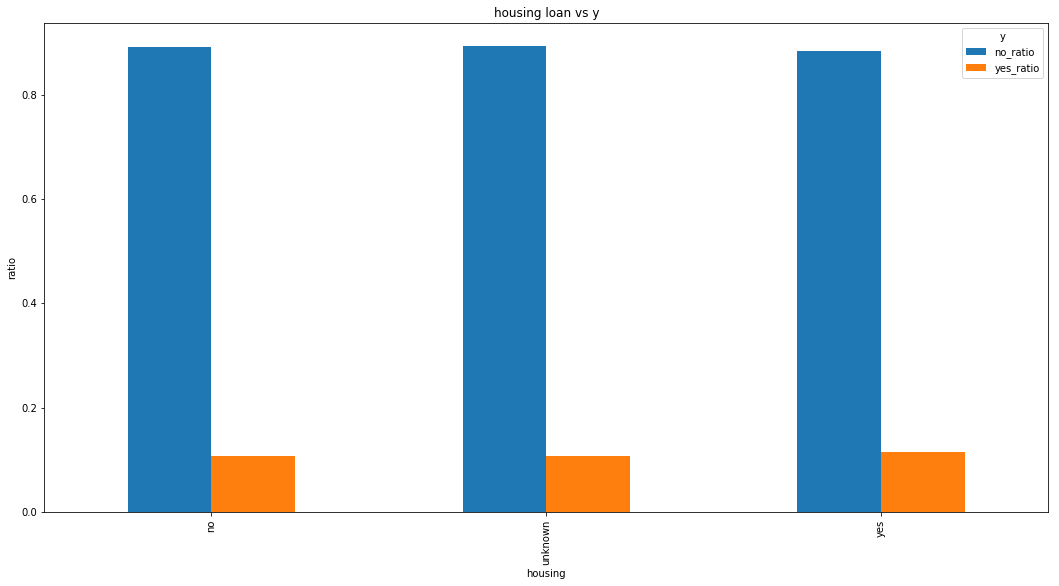

In [40]:
crosstab_plot("housing", "y", "housing loan vs y")

***Those who have housing loan have relatively higher success ratio.***

y           no   yes  total  no_ratio  yes_ratio
loan                                            
no       30100  3850  33950  0.886598   0.113402
unknown    883   107    990  0.891919   0.108081
yes       5565   683   6248  0.890685   0.109315


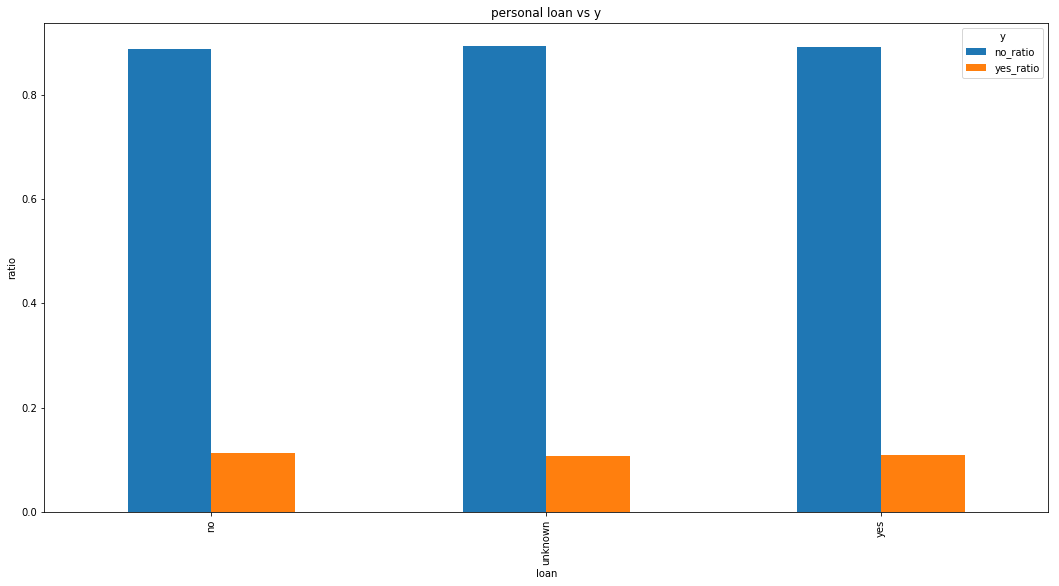

In [41]:
crosstab_plot("loan", "y", "personal loan vs y")

***Those who doesn't have personal loan have relatively higher success ratio.***

y             no   yes  total  no_ratio  yes_ratio
contact                                           
cellular   22291  3853  26144  0.852624   0.147376
telephone  14257   787  15044  0.947687   0.052313


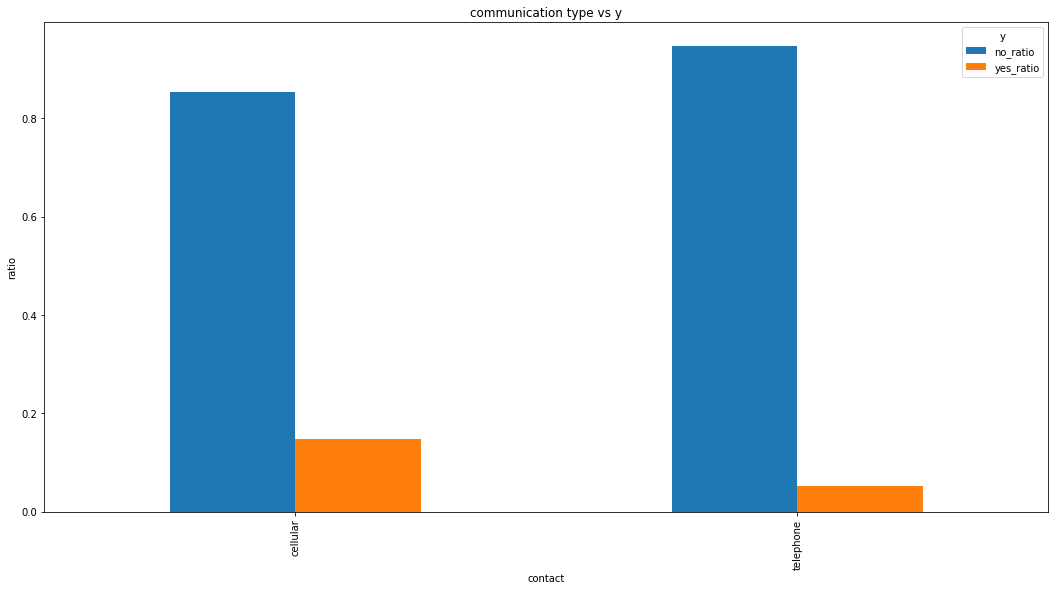

In [42]:
crosstab_plot("contact", "y", "communication type vs y")

***Clients who were called on cellular phones are having higher success ratio then who were called on telephone.***

y         no  yes  total  no_ratio  yes_ratio
month                                        
apr     2093  539   2632  0.795213   0.204787
aug     5523  655   6178  0.893979   0.106021
dec       93   89    182  0.510989   0.489011
jul     6525  649   7174  0.909534   0.090466
jun     4759  559   5318  0.894885   0.105115
mar      270  276    546  0.494505   0.505495
may    12883  886  13769  0.935653   0.064347
nov     3685  416   4101  0.898561   0.101439
oct      403  315    718  0.561281   0.438719
sep      314  256    570  0.550877   0.449123


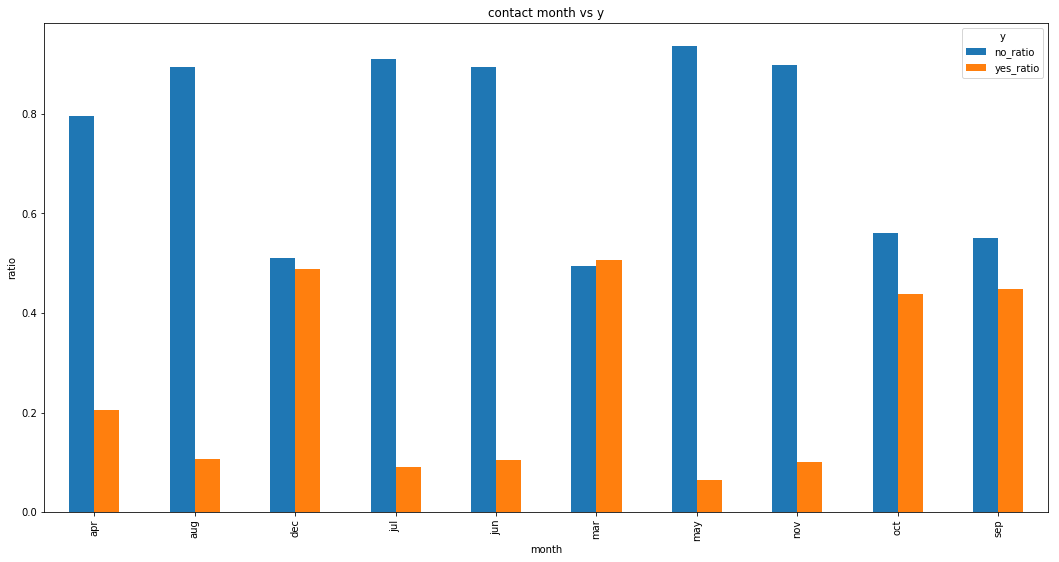

In [43]:
crosstab_plot("month", "y", "contact month vs y")

***Clients who were called in Sep, Oct, Dec and Mar have higher success ratio but number clients called during these months were less as compared to other months.***

y              no   yes  total  no_ratio  yes_ratio
day_of_week                                        
fri          6981   846   7827  0.891913   0.108087
mon          7667   847   8514  0.900517   0.099483
thu          7578  1045   8623  0.878812   0.121188
tue          7137   953   8090  0.882200   0.117800
wed          7185   949   8134  0.883329   0.116671


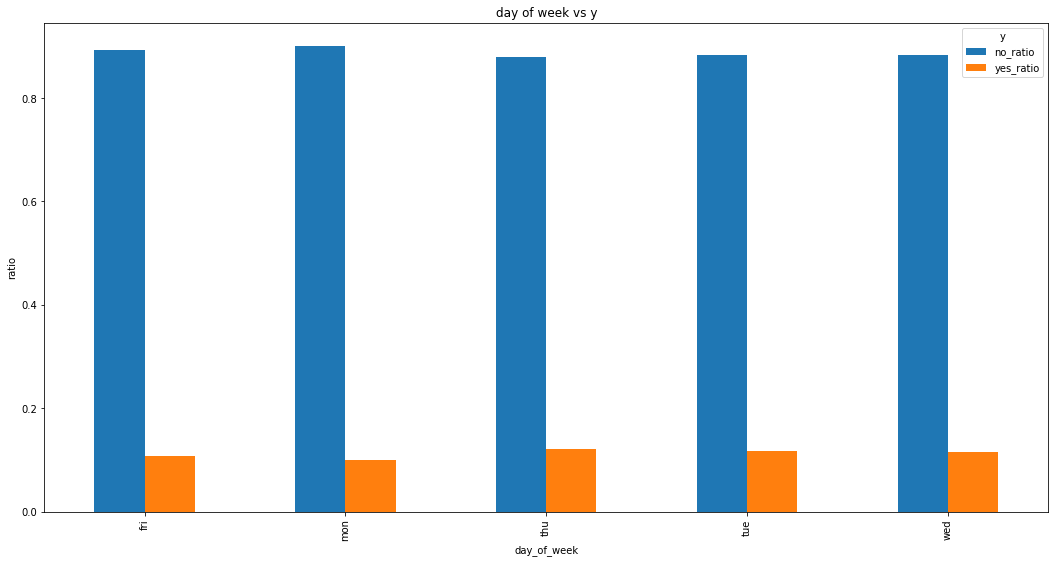

In [44]:
crosstab_plot("day_of_week", "y", "day of week vs y")

***No clear difference among the success ratio of the clients who were called on particular day of week.***

y            no   yes  total  no_ratio  yes_ratio
campaign                                         
1         15342  2300  17642  0.869629   0.130371
2          9359  1211  10570  0.885430   0.114570
3          4767   574   5341  0.892529   0.107471
4          2402   249   2651  0.906073   0.093927
5          1479   120   1599  0.924953   0.075047
6           904    75    979  0.923391   0.076609
7           591    38    629  0.939587   0.060413
8           383    17    400  0.957500   0.042500
9           266    17    283  0.939929   0.060071
10          213    12    225  0.946667   0.053333
11          165    12    177  0.932203   0.067797
12          122     3    125  0.976000   0.024000
13           88     4     92  0.956522   0.043478
14           68     1     69  0.985507   0.014493
15           49     2     51  0.960784   0.039216
16           51     0     51  1.000000   0.000000
17           54     4     58  0.931034   0.068966
18           33     0     33  1.000000   0.000000


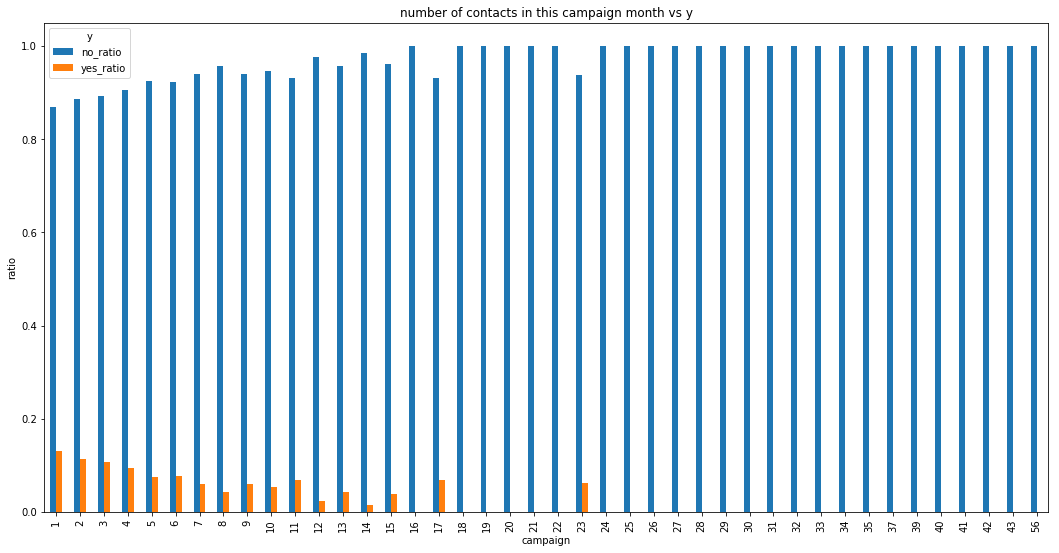

In [45]:
crosstab_plot("campaign", "y", "number of contacts in this campaign month vs y")

***With increasing number of contacts during this campaign success ratio is decreasing.***

y         no   yes  total  no_ratio  yes_ratio
pdays                                         
0          5    10     15  0.333333   0.666667
1         18     8     26  0.692308   0.307692
2         24    37     61  0.393443   0.606557
3        141   298    439  0.321185   0.678815
4         55    63    118  0.466102   0.533898
5         17    29     46  0.369565   0.630435
6        123   289    412  0.298544   0.701456
7         20    40     60  0.333333   0.666667
8          6    12     18  0.333333   0.666667
9         29    35     64  0.453125   0.546875
10        22    30     52  0.423077   0.576923
11        13    15     28  0.464286   0.535714
12        32    26     58  0.551724   0.448276
13         8    28     36  0.222222   0.777778
14         9    11     20  0.450000   0.550000
15         8    16     24  0.333333   0.666667
16         5     6     11  0.454545   0.545455
17         6     2      8  0.750000   0.250000
18         3     4      7  0.428571   0.571429
19         2 

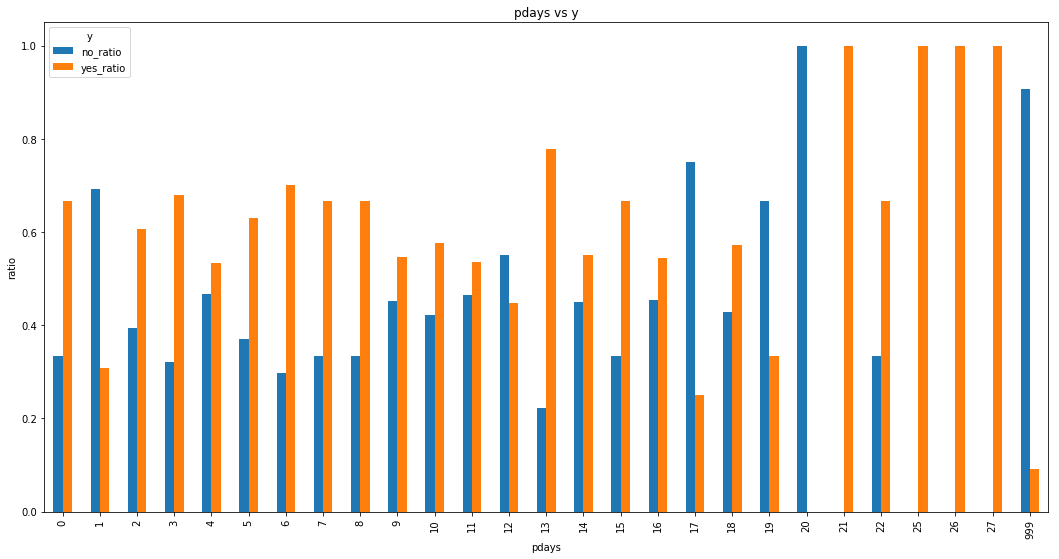

In [46]:
crosstab_plot("pdays", "y", "pdays vs y")

***There is no clear dependency on number of days client was contacted before this contact and success ratio. Most of the clients were not contacted before.***

y            no   yes  total  no_ratio  yes_ratio
previous                                         
0         32422  3141  35563  0.911678   0.088322
1          3594   967   4561  0.787985   0.212015
2           404   350    754  0.535809   0.464191
3            88   128    216  0.407407   0.592593
4            32    38     70  0.457143   0.542857
5             5    13     18  0.277778   0.722222
6             2     3      5  0.400000   0.600000
7             1     0      1  1.000000   0.000000


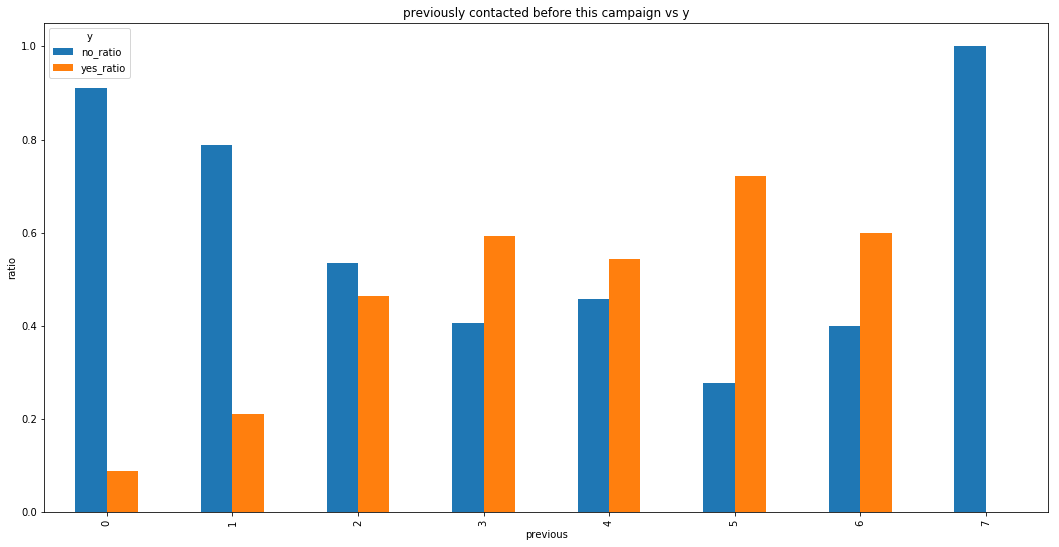

In [47]:
crosstab_plot("previous", "y", "previously contacted before this campaign vs y")

***Till number of tmes previously contacted is incresing sucess ratio is also higher between 2 to 6 times contact but sample size of this is very small as most of the clients were contacted first time.***

y               no   yes  total  no_ratio  yes_ratio
poutcome                                            
failure       3647   605   4252  0.857714   0.142286
nonexistent  32422  3141  35563  0.911678   0.088322
success        479   894   1373  0.348871   0.651129


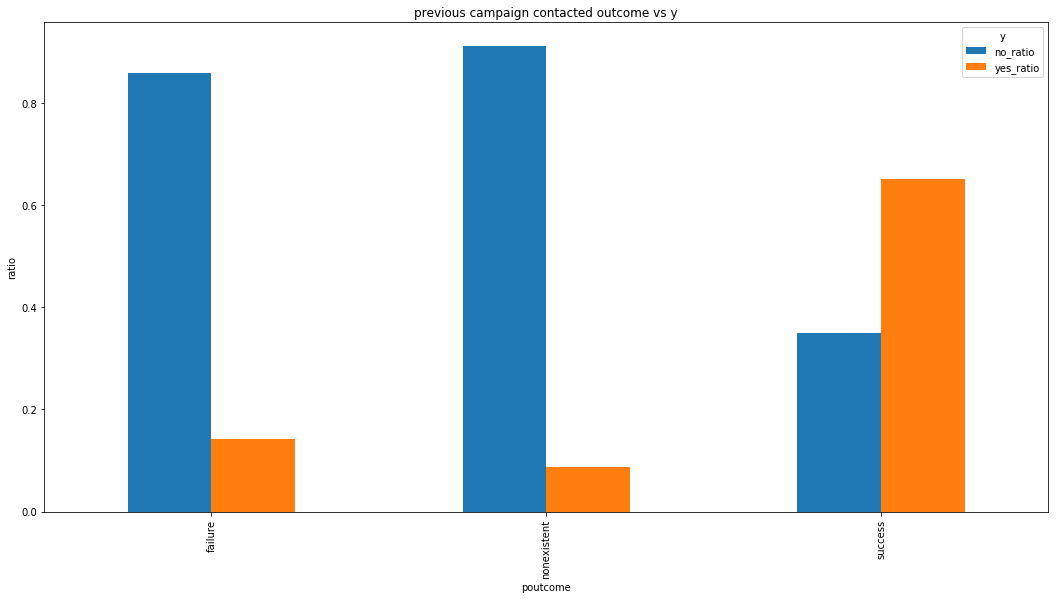

In [48]:
crosstab_plot("poutcome", "y", "previous campaign contacted outcome vs y")

***if previous contact outcome was success then there is higher of success during this time as well but most of the clients were contacted first time.***

y                no   yes  total  no_ratio  yes_ratio
emp.var.rate                                         
-3.4            617   454   1071  0.576097   0.423903
-3.0             84    88    172  0.488372   0.511628
-2.9           1069   594   1663  0.642814   0.357186
-1.8           7723  1461   9184  0.840919   0.159081
-1.7            370   403    773  0.478655   0.521345
-1.1            334   301    635  0.525984   0.474016
-0.2              9     1     10  0.900000   0.100000
-0.1           3451   232   3683  0.937008   0.062992
 1.1           7523   240   7763  0.969084   0.030916
 1.4          15368   866  16234  0.946655   0.053345


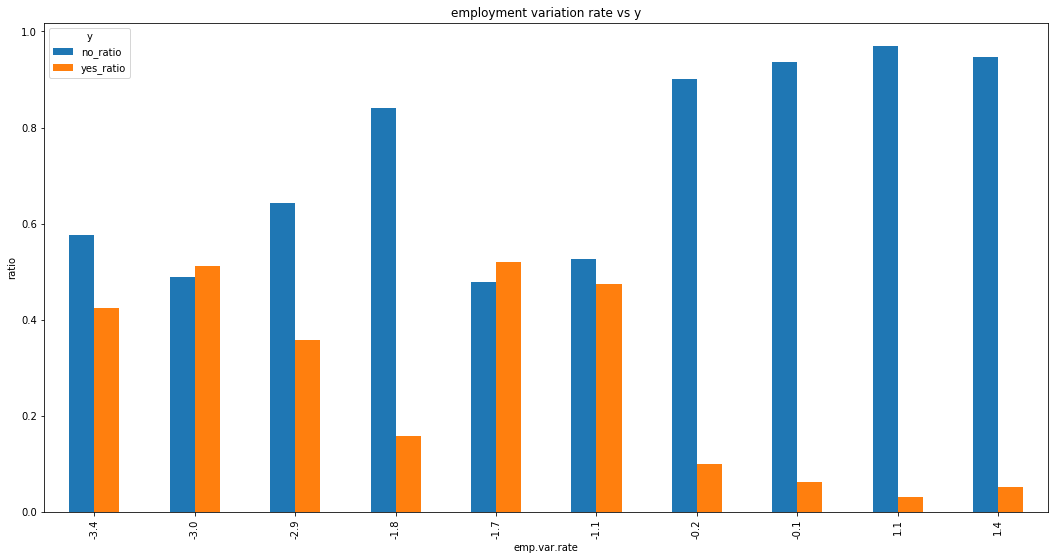

In [49]:
crosstab_plot("emp.var.rate", "y", "employment variation rate vs y")

y                 no  yes  total  no_ratio  yes_ratio
cons.price.idx                                       
92.201           506  264    770  0.657143   0.342857
92.379           161  106    267  0.602996   0.397004
92.431           267  180    447  0.597315   0.402685
92.469           112   66    178  0.629213   0.370787
92.649           189  168    357  0.529412   0.470588
92.713            84   88    172  0.488372   0.511628
92.756             9    1     10  0.900000   0.100000
92.843           156  126    282  0.553191   0.446809
92.893          5270  524   5794  0.909562   0.090438
92.963           451  264    715  0.630769   0.369231
93.075          2016  442   2458  0.820179   0.179821
93.200          3426  190   3616  0.947456   0.052544
93.369           114  150    264  0.431818   0.568182
93.444          4904  271   5175  0.947633   0.052367
93.749            77   97    174  0.442529   0.557471
93.798            25   42     67  0.373134   0.626866
93.876            90  122   

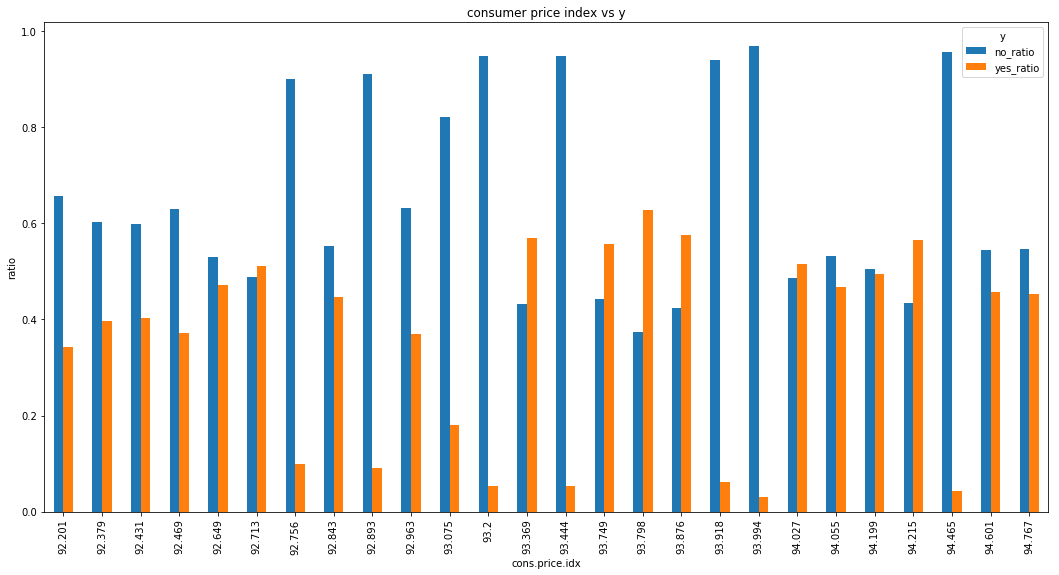

In [50]:
crosstab_plot("cons.price.idx", "y", "consumer price index vs y")

y                no  yes  total  no_ratio  yes_ratio
cons.conf.idx                                       
-50.8            70   58    128  0.546875   0.453125
-50.0           156  126    282  0.553191   0.446809
-49.5           111   93    204  0.544118   0.455882
-47.1          2016  442   2458  0.820179   0.179821
-46.2          5270  524   5794  0.909562   0.090438
-45.9             9    1     10  0.900000   0.100000
-42.7          6278  407   6685  0.939117   0.060883
-42.0          3426  190   3616  0.947456   0.052544
-41.8          4186  188   4374  0.957019   0.042981
-40.8           451  264    715  0.630769   0.369231
-40.4            25   42     67  0.373134   0.626866
-40.3           135  176    311  0.434084   0.565916
-40.0            90  122    212  0.424528   0.575472
-39.8           122  107    229  0.532751   0.467249
-38.3           113  120    233  0.484979   0.515021
-37.5           153  150    303  0.504950   0.495050
-36.4          7523  240   7763  0.969084   0.

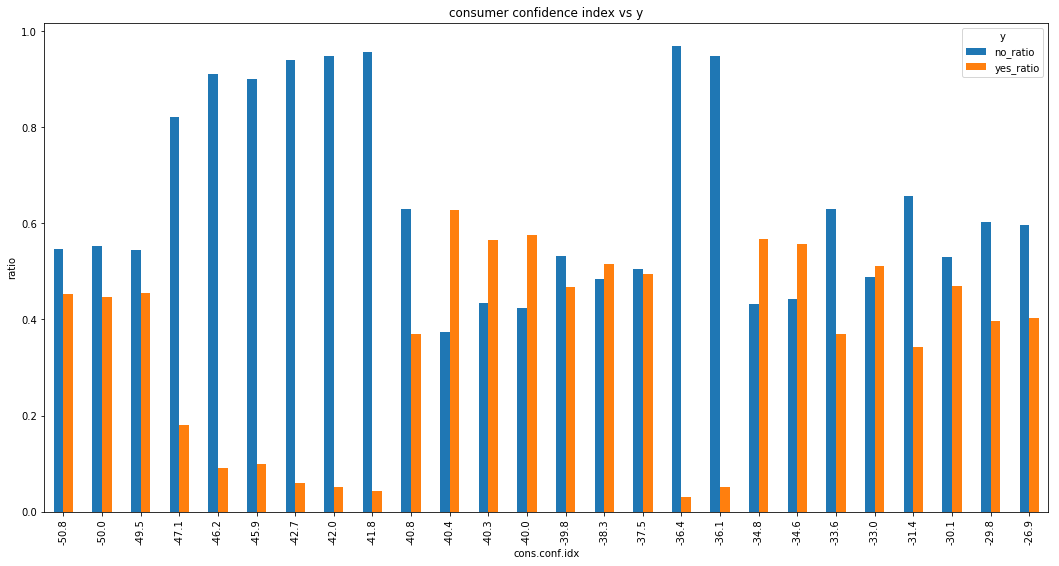

In [51]:
crosstab_plot("cons.conf.idx", "y", "consumer confidence index vs y")

y            no  yes  total  no_ratio  yes_ratio
euribor3m                                       
0.634         2    6      8  0.250000   0.750000
0.635        21   22     43  0.488372   0.511628
0.636        11    3     14  0.785714   0.214286
0.637         1    5      6  0.166667   0.833333
0.638         2    5      7  0.285714   0.714286
0.639         5   11     16  0.312500   0.687500
0.640         5    5     10  0.500000   0.500000
0.642        18   17     35  0.514286   0.485714
0.643        12   11     23  0.521739   0.478261
0.644        14   24     38  0.368421   0.631579
0.645        15   11     26  0.576923   0.423077
0.646        26   23     49  0.530612   0.469388
0.649         4    6     10  0.400000   0.600000
0.650         8    4     12  0.666667   0.333333
0.651         4    3      7  0.571429   0.428571
0.652         8   27     35  0.228571   0.771429
0.653         6   13     19  0.315789   0.684211
0.654         7   13     20  0.350000   0.650000
0.655        10   24

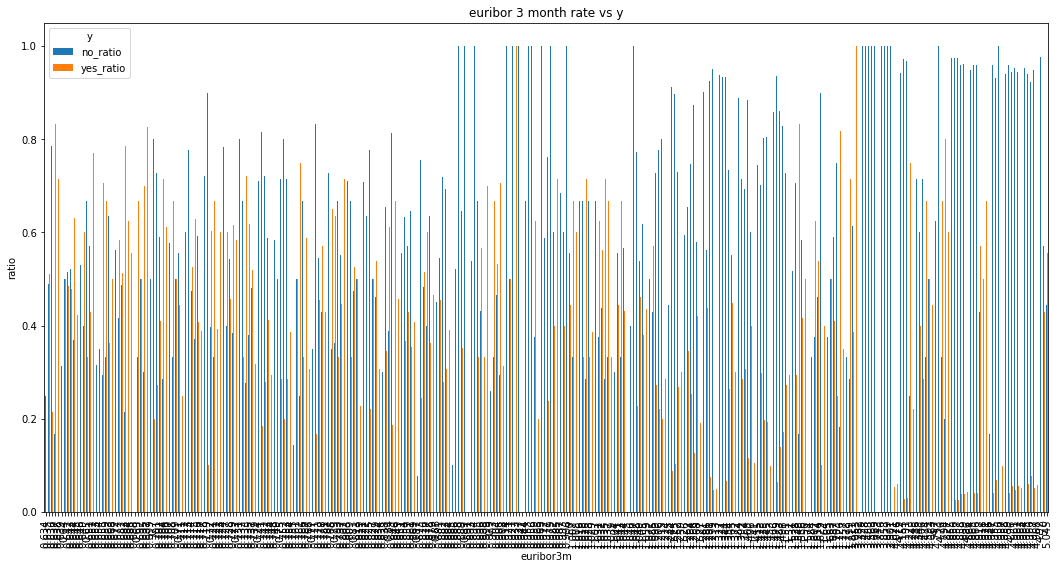

In [52]:
crosstab_plot("euribor3m", "y", "euribor 3 month rate vs y")

y               no   yes  total  no_ratio  yes_ratio
nr.employed                                         
4963.6         334   301    635  0.525984   0.474016
4991.6         370   403    773  0.478655   0.521345
5008.7         281   369    650  0.432308   0.567692
5017.5         617   454   1071  0.576097   0.423903
5023.5          84    88    172  0.488372   0.511628
5076.2        1069   594   1663  0.642814   0.357186
5099.1        7442  1092   8534  0.872041   0.127959
5176.3           9     1     10  0.900000   0.100000
5191.0        7523   240   7763  0.969084   0.030916
5195.8        3451   232   3683  0.937008   0.062992
5228.1       15368   866  16234  0.946655   0.053345


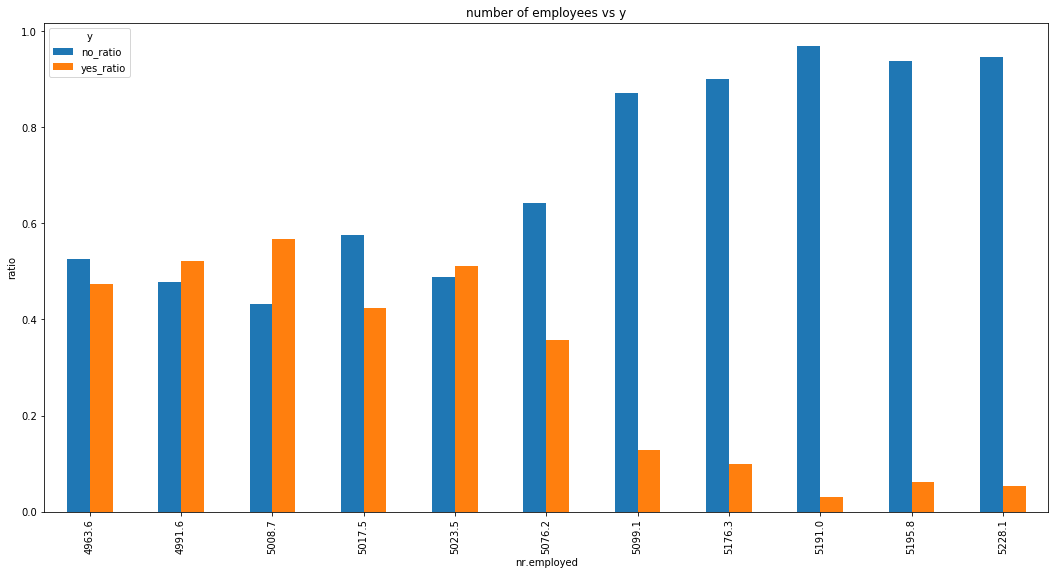

In [53]:
crosstab_plot("nr.employed", "y", "number of employees vs y")

***Above 5 graphs are social indicators and usually don't affect as these are not individual indicators. So we will not consider these values while working on this data set.***

# Data Pre-processing
This section will be used for data preprocessing and feature engineering as there is no conclusive evidence of any relationship of various features and outcome.

we will not consider duration column as this is highly correlated with outcome as "no". If duration is 0 then surely outcome will be "no".

Also we will log transform the numeric data because most of the values are highly skewed.

We will also use min max scaler for numeric data and one-hot-encoding for the categorical data.

We will remove the age feature and change it with life-stage feature.

In [54]:
#save the data to another dataset.

bank = bank_additional.copy(deep=True)

In [55]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [56]:
#Remove the duration column from the bank data set.
bank.drop("duration", axis=1, inplace=True)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


**As we can see earlier, success ratio was highly dependent on the life stage of the client. So a new column life stage will be added in the data set. We will consider following things:**

teenage : age < 20

young : age > 19 & age < 41

mid_age : age > 40 & age < 61

old : age > 60

In [57]:
#adding life_stage column
bank["life_stage"] = 0
bank.loc[bank["age"] < 20, "life_stage"] = "teenage"
bank.loc[(bank["age"] >19) & (bank["age"] < 41), "life_stage"] = "young"
bank.loc[(bank["age"] >40) & (bank["age"] < 61), "life_stage"] = "mid_age"
bank.loc[bank["age"] > 60, "life_stage"] = "old"
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,life_stage
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,mid_age
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,mid_age
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,mid_age


In [58]:
bank["life_stage"].value_counts()

young      23693
mid_age    16510
old          910
teenage       75
Name: life_stage, dtype: int64

In [59]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
life_stage        41188 non-null object
dtypes: float64(5), int64(4), object(12)
memory us

In [60]:
bank.drop("age", axis=1, inplace=True)

In [61]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
life_stage        41188 non-null object
dtypes: float64(5), int64(3), object(12)
memory usage: 6.3+ MB


In [62]:
#numeric_to_object_features = ["campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", 
#                             "nr.employed"]

#bank[numeric_to_object_features] = bank[numeric_to_object_features].astype("object")
#bank.info()

In [63]:
#Performing minmax scaler on numeric features.
scaler = preprocessing.MinMaxScaler()
numeric = ["campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
features_min_max_transform = pd.DataFrame(data=bank)
features_min_max_transform[numeric] = scaler.fit_transform(features_min_max_transform[numeric])
display(features_min_max_transform.head())

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,life_stage
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,mid_age
1,services,married,high.school,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,mid_age
2,services,married,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,young
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,young
4,services,married,high.school,no,no,yes,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,mid_age


In [64]:
#Save features and outcome to separate variables.
outcome = bank["y"]
features_final = features_min_max_transform.drop("y", axis=1)

In [65]:
outcome.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [66]:
features_final.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,life_stage
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,mid_age
1,services,married,high.school,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,mid_age
2,services,married,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,young
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,young
4,services,married,high.school,no,no,yes,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,mid_age


In [67]:
features_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null float64
pdays             41188 non-null float64
previous          41188 non-null float64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
life_stage        41188 non-null object
dtypes: float64(8), object(11)
memory usage: 6.0+ MB


In [68]:
features_final_encoded = pd.get_dummies(features_final)

In [69]:
encoded = features_final_encoded.columns
print(encoded)

Index([u'campaign', u'pdays', u'previous', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'job_admin.',
       u'job_blue-collar', u'job_entrepreneur', u'job_housemaid',
       u'job_management', u'job_retired', u'job_self-employed',
       u'job_services', u'job_student', u'job_technician', u'job_unemployed',
       u'job_unknown', u'marital_divorced', u'marital_married',
       u'marital_single', u'marital_unknown', u'education_basic.4y',
       u'education_basic.6y', u'education_basic.9y', u'education_high.school',
       u'education_illiterate', u'education_professional.course',
       u'education_university.degree', u'education_unknown', u'default_no',
       u'default_unknown', u'default_yes', u'housing_no', u'housing_unknown',
       u'housing_yes', u'loan_no', u'loan_unknown', u'loan_yes',
       u'contact_cellular', u'contact_telephone', u'month_apr', u'month_aug',
       u'month_dec', u'month_jul', u'month_jun', u'month_mar', u'mon

In [70]:
features_final_encoded.shape

(41188, 65)

In [71]:
outcome = outcome.apply(lambda x : 1 if x == "yes" else 0)
outcome.value_counts()

0    36548
1     4640
Name: y, dtype: int64

# Benchmark model

We will consider every client said "yes" as we dont want to miss any client who said yes. So following are the various parameters.
We want to focus on recall so we will keep $\beta$ = 0. Following are the various other parameters.

$\beta$ = 0

TP = 4640

TN = 35548




In [72]:
TP = float(np.sum(outcome))
FP = float(outcome.count() - TP)
TN = 0
FN = 0
beta = 0.001

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

#print(accuracy, recall, precision)

f1 = (1 + beta**2)*((precision*recall)/(beta**2*precision + recall))

print("fscore is {} and accuracy is {}".format(f1, accuracy))

fscore is 0.112654271081 and accuracy is 0.112654171118


# We are going to use following classification alogorithm for this problem

- Logistic regression

- K-Nearest Neighbour

- Gradient boosting

- Ada boosting

- Random forest classifier

- Support Vector classifier

We are gonna use fscore as metric with $\beta$ = 0.

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [74]:
# Split the 'features' and 'income' data into training and testing sets
X_train_validation, X_test, y_train_validation, y_test = train_test_split(features_final_encoded, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                    y_train_validation, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_validation.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24712 samples.
Validation set has 8238 samples.
Testing set has 8238 samples.


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_validation, y_validation, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: outcome training set
       - X_validation : Feature validation set
       - y_validation : outcome validation set
       - X_test: features testing set
       - y_test: outcome testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: get the prediction on the training set and calculate the prediction time on training set.
    start = time() # Get start time
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time_training'] = end - start
    
    
    # TODO: Get the prediction on the validation set and test set and calculate the time.
    start = time() # Get start time
    predictions_validation = learner.predict(X_validation)
    predictions_test = learner.predict(X_test)
    end = time() # Get end time
    # TODO: Calculate the total prediction time
    results['pred_time_validation_test'] = end - start
    
    
    # TODO: Compute accuracy on the training samples which is y_train
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    
    # TODO:Compute accuracy on validation set using accuracy_score()
    results['acc_validation'] = accuracy_score(y_validation, predictions_validation)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.001)
    
    # TODO: Compute F-score on the test set which is y_test
    results['f_validation'] = fbeta_score(y_validation, predictions_validation, beta=0.001)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.001)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [76]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score



def evaluation_graphs(results, accuracy, f1):
    
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(3, 3, figsize = (11,7))

    # Constants
    bar_width = 0.15
    #colors = ['#A00000','#00A0A0','#00A000']
    colors = ["black", "red", "darkgreen", "slategray", "y", "magenta"]
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 
                                    'pred_time_training', 'acc_validation', 'f_validation', 
                                    'pred_time_validation_test', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["10%", "50%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[2, 0].set_ylabel("Time (in seconds)")
    ax[2, 1].set_ylabel("Accuracy Score")
    ax[2, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting on Training set")
    ax[1, 1].set_title("Accuracy Score on Validation Set")
    ax[1, 2].set_title("F-score on Validation Set")
    ax[2, 0].set_title("Model Predicting on Validation and test set")
    ax[2, 1].set_title("Accuracy Score on test Set")
    ax[2, 2].set_title("F-score on test Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[2, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[2, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[2, 1].set_ylim((0, 1))
    ax[2, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-0.80, 4.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 6, fontsize = 'medium')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for learning models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()
    

LogisticRegression trained on 2471 samples.
LogisticRegression trained on 12356 samples.
LogisticRegression trained on 24712 samples.
RandomForestClassifier trained on 2471 samples.
RandomForestClassifier trained on 12356 samples.
RandomForestClassifier trained on 24712 samples.
AdaBoostClassifier trained on 2471 samples.
AdaBoostClassifier trained on 12356 samples.
AdaBoostClassifier trained on 24712 samples.
GradientBoostingClassifier trained on 2471 samples.
GradientBoostingClassifier trained on 12356 samples.
GradientBoostingClassifier trained on 24712 samples.
SVC trained on 2471 samples.
SVC trained on 12356 samples.
SVC trained on 24712 samples.
KNeighborsClassifier trained on 2471 samples.
KNeighborsClassifier trained on 12356 samples.
KNeighborsClassifier trained on 24712 samples.


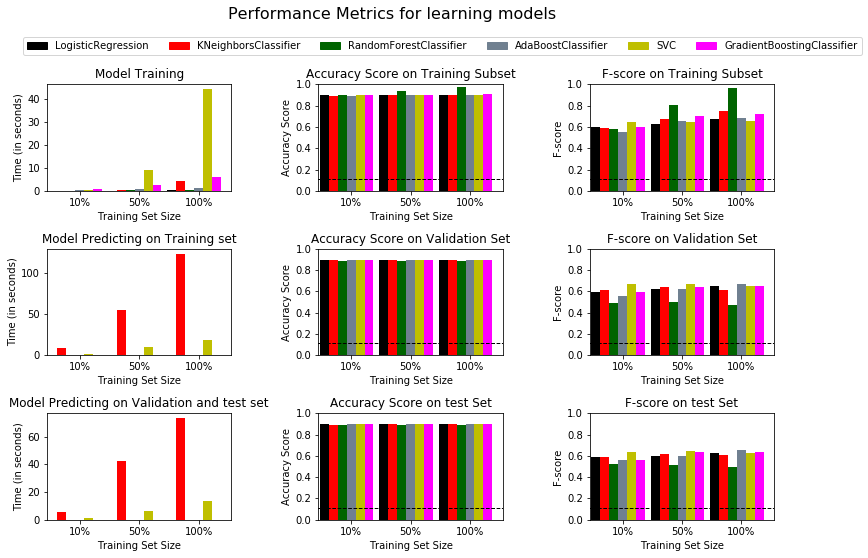

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from pprint import pprint


# TODO: Initialize the three models
clf_A = LogisticRegression(random_state= 1)
clf_B = RandomForestClassifier(random_state=1)
clf_C = AdaBoostClassifier(random_state=1)
clf_D = GradientBoostingClassifier(random_state=1)
clf_E = SVC(random_state=1)
clf_F = KNeighborsClassifier(n_neighbors=8)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_50 = int(round(len(y_train)*0.5))
samples_10 = int(round(len(y_train)*0.1))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50, samples_100]):
        results[clf_name][i] = train_predict(clf, samples,  X_train, y_train, X_validation, y_validation, X_test, y_test)
        

#pprint(results)
# Run metrics visualization for the three supervised learning models chosen
evaluation_graphs(results, accuracy, f1)

# Best classifier selection

We have tried 6 classifer as stated earlier.

We have calculated F-score and accuracy on validation set test set as well by diving data set into 3 parts.
We can clearly see accuracy score on all three are not very different but F1 score is varying lot. Among all the classifiers Adaboost stands out the best classifier as well Adaboost doesnt have very high training and testing time as well.

We will further tune adaboost classifier to improve accuracy.


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200], 
             'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1, 5, 10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.001)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions_validation = (clf.fit(X_train, y_train)).predict(X_validation)
best_predictions_validation = best_clf.predict(X_validation)

predictions_test = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions_test = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_validation, predictions_validation)))
print("F-score on validation data: {:.4f}".format(fbeta_score(y_validation, predictions_validation, beta = 0.001)))

print("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, predictions_test)))
print("F-score on test data: {:.4f}".format(fbeta_score(y_test, predictions_test, beta = 0.001)))

print("\nOptimized Model\n------")
print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_validation, best_predictions_validation)))
print("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_validation, best_predictions_validation, beta = 0.001)))

print("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, best_predictions_test)))
print("Final F-score on the test data: {:.4f}".format(fbeta_score(y_test, best_predictions_test, beta = 0.001)))

C:\Users\svarshne\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Unoptimized model
------
Accuracy score on validation data: 0.8990
F-score on validation data: 0.6733
Accuracy score on test data: 0.8997
F-score on test data: 0.6525

Optimized Model
------
Final accuracy score on the validation data: 0.8992
Final F-score on the validation data: 0.7208
Final accuracy score on the test data: 0.8996
Final F-score on the test data: 0.6840


In [80]:
best_clf.get_params

<bound method AdaBoostClassifier.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=10, random_state=1)>

In [81]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()  


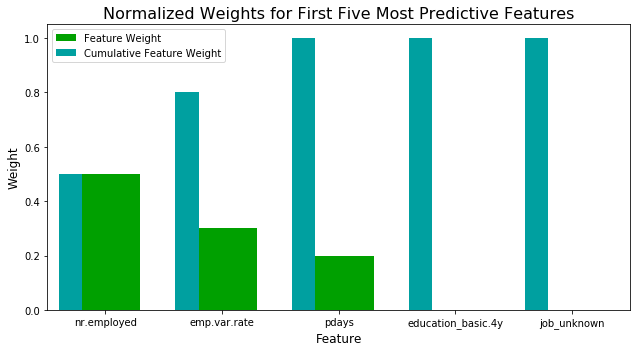

In [82]:
# TODO: Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_
# Plot
feature_plot(importances, X_train, y_train)

**We can clearly see only first 3 features are important which is giving 100% weight. So we will fit model with reduced features.**

In [83]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:3]]]
X_validation_reduced = X_validation[X_validation.columns.values[(np.argsort(importances)[::-1])[:3]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:3]]]

# Train on the "best" model found from grid search earlier
clf_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions_validation = clf_reduced.predict(X_validation_reduced)
reduced_predictions_test = clf_reduced.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_validation, best_predictions_validation)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_validation, best_predictions_validation, beta = 0.001)))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_test)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_test, beta = 0.001)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_validation, reduced_predictions_validation)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_validation, reduced_predictions_validation, beta = 0.001)))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions_test)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions_test, beta = 0.001)))

Final Model trained on full data
------
Accuracy on testing data: 0.8992
F-score on testing data: 0.7208
Accuracy on testing data: 0.8996
F-score on testing data: 0.6840

Final Model trained on reduced data
------
Accuracy on testing data: 0.8992
F-score on testing data: 0.7208
Accuracy on testing data: 0.8996
F-score on testing data: 0.6840


**We can clearly see same accuracy and F score on reduced as well as on full data because only top 3 features are the contributing features and rest features are not contributing at all**

In [84]:
#K-fold application on model with reduced features.
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.model_selection import cross_val_score

model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2, n_estimators=10, random_state=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

X_reduced = features_final_encoded[features_final_encoded.columns.values[(np.argsort(importances)[::-1])[:3]]]

result_accuracy = cross_val_score(model, X_reduced, outcome, scoring="accuracy", cv=kfold)
result_fbeta = cross_val_score(model, X_reduced, outcome, scoring=scorer, cv=kfold)


In [85]:
print("mean of accuracy is {} and standard deviation of accuracy is {}".format(result_accuracy.mean(), result_accuracy.std()))
print("mean of f-score is {} and standard deviation of f-score is {}".format(result_fbeta.mean(), result_fbeta.std()))

mean of accuracy is 0.899315453882 and standard deviation of accuracy is 0.00447535553146
mean of f-score is 0.700313644539 and standard deviation of f-score is 0.0271130901026


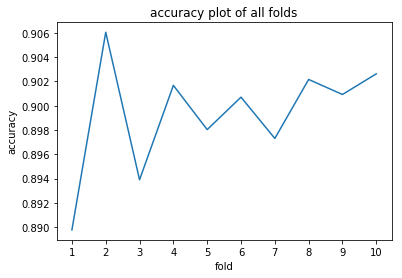

In [86]:
plt.plot(range(1, 11), result_accuracy)
plt.title("accuracy plot of all folds")
plt.xlabel("fold")
plt.ylabel("accuracy")
plt.xticks(range(1, 11))
plt.show()

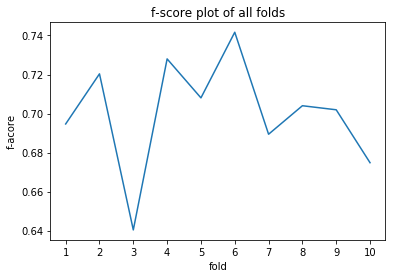

In [87]:
plt.plot(range(1, 11), result_fbeta)
plt.title("f-score plot of all folds")
plt.xlabel("fold")
plt.ylabel("f-acore")
plt.xticks(range(1, 11))
plt.show()

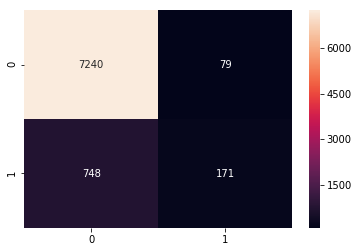

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

pred = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')

# Checking time requirement on reduced data set.

In [89]:
#divide the reduced data into various parts like train, validation and test.
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X_reduced, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                    y_train_validation, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


# Show the results of the split
print("Training set has {} samples and has {} features.".format(X_train.shape[0], X_train.shape[1]))
print("Validation set has {} samples and has {} features.".format(X_validation.shape[0], X_validation.shape[1]))
print("Testing set has {} samples and has {} features.".format(X_test.shape[0], X_test.shape[1]))

Training set has 24712 samples and has 3 features.
Validation set has 8238 samples and has 3 features.
Testing set has 8238 samples and has 3 features.


LogisticRegression trained on 2471 samples.
LogisticRegression trained on 12356 samples.
LogisticRegression trained on 24712 samples.
RandomForestClassifier trained on 2471 samples.
RandomForestClassifier trained on 12356 samples.
RandomForestClassifier trained on 24712 samples.
AdaBoostClassifier trained on 2471 samples.
AdaBoostClassifier trained on 12356 samples.
AdaBoostClassifier trained on 24712 samples.
GradientBoostingClassifier trained on 2471 samples.
GradientBoostingClassifier trained on 12356 samples.
GradientBoostingClassifier trained on 24712 samples.
SVC trained on 2471 samples.
SVC trained on 12356 samples.
SVC trained on 24712 samples.
KNeighborsClassifier trained on 2471 samples.
KNeighborsClassifier trained on 12356 samples.
KNeighborsClassifier trained on 24712 samples.


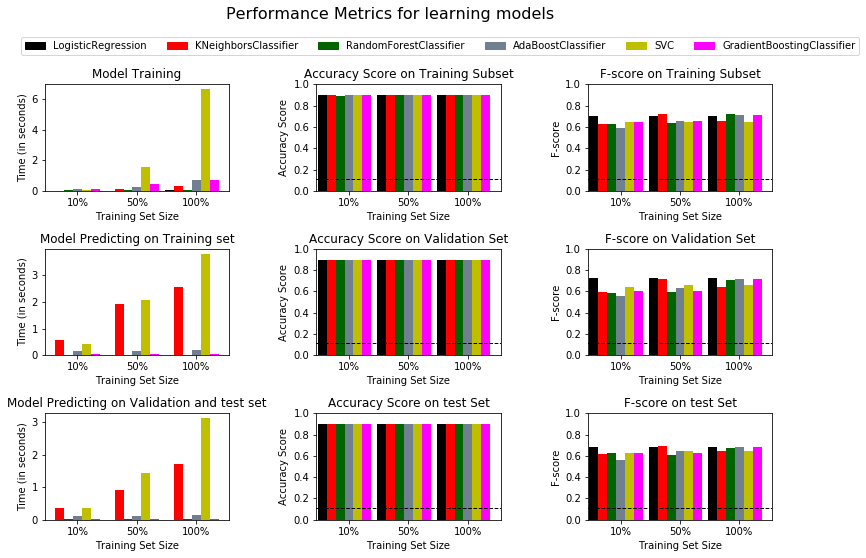

In [90]:
# TODO: Initialize the three models
clf_A = LogisticRegression(random_state= 1)
clf_B = RandomForestClassifier(random_state=1)
clf_C = AdaBoostClassifier(random_state=1)
clf_D = GradientBoostingClassifier(random_state=1)
clf_E = SVC(random_state=1)
clf_F = KNeighborsClassifier(n_neighbors=8)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_50 = int(round(len(y_train)*0.5))
samples_10 = int(round(len(y_train)*0.1))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50, samples_100]):
        results[clf_name][i] = train_predict(clf, samples,  X_train, y_train, X_validation, y_validation, X_test, y_test)
        

#pprint(results)
# Run metrics visualization for the three supervised learning models chosen
evaluation_graphs(results, accuracy, f1)